Import dependencies.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Read the data.

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Clean the data.

In [3]:
# Remove the column 'Time'.
df = df.drop(["Time"], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Discovery.

In [4]:
# Positives.
positives = df[df.Class == 1]
print("Num positives\t\t:", len(positives))
print("Total number\t\t:", len(df))
print("Positive percentage\t:", round((len(positives) / float(len(df))), 6), "%")

Num positives		: 492
Total number		: 284807
Positive percentage	: 0.001727 %


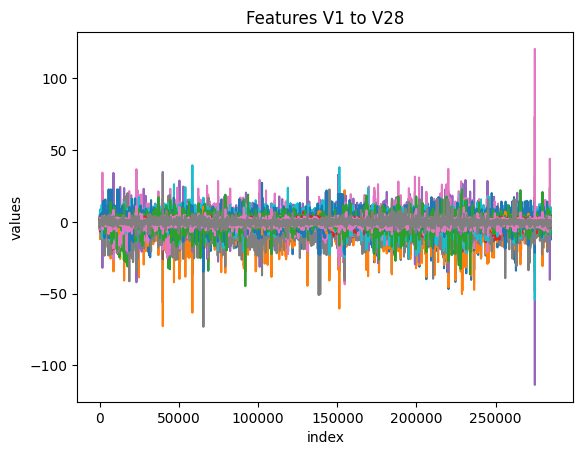

In [5]:
# Visualise features V1 to V28.
plt_time = df.loc[:,df.columns.str.startswith("V")].plot(title="Features V1 to V28")
plt_time.set_xlabel("index")
plt_time.set_ylabel("values")
plt_time.get_legend().remove()

Text(0, 0.5, 'amount')

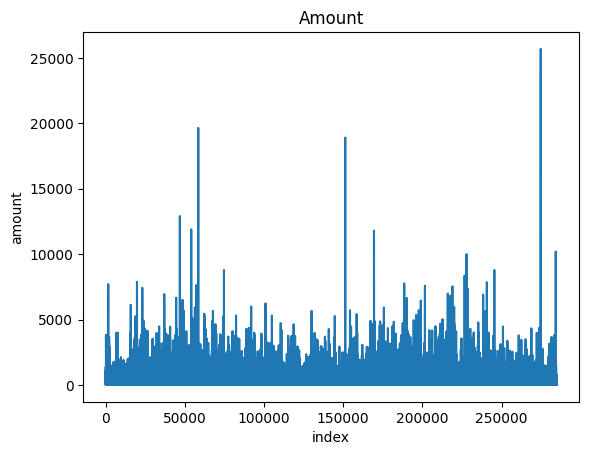

In [6]:
# Visualise amount.
plt_time = df["Amount"].plot(title="Amount")
plt_time.set_xlabel("index")
plt_time.set_ylabel("amount")

Divide the data into inputs (X) and target (y).

In [7]:
X = df.loc[:, df.columns != "Class"]
y = df["Class"]

Divide the data into train and test.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)

Preprocess the data.

In [9]:
# Scale the inputs.

scaler = MinMaxScaler()

scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)

array([[9.15234952e-01, 7.87209777e-01, 8.22848014e-01, ...,
        4.13241037e-01, 3.11445819e-01, 1.45575365e-03],
       [9.54081625e-01, 7.78908343e-01, 8.40984848e-01, ...,
        4.19166970e-01, 3.15900168e-01, 3.60824502e-04],
       [9.68010054e-01, 7.40664255e-01, 8.18107197e-01, ...,
        4.14721110e-01, 3.14923578e-01, 2.72467261e-02],
       ...,
       [9.93892718e-01, 7.57431618e-01, 8.10500806e-01, ...,
        4.15470674e-01, 3.12029505e-01, 2.88036819e-03],
       [9.80314880e-01, 7.68287824e-01, 8.33786695e-01, ...,
        4.15696670e-01, 3.13195672e-01, 7.70693110e-05],
       [9.95958637e-01, 7.61095983e-01, 8.15949188e-01, ...,
        4.15447145e-01, 3.11906514e-01, 6.18889922e-04]])

Create the model and fit the data.

In [10]:
model = Perceptron(n_iter_no_change= 15,
                   random_state=42)

model.fit(X_train, y_train)

Perceptron(n_iter_no_change=15, random_state=42)

Predict using test data.

In [11]:
y_pred = model.predict(X_test)

Evaluate the model.

In [12]:
# Accuracy.
accuracy_score(y_test, y_pred)

0.9990285921608558

In [13]:
# Confusion matrix.
confusion_matrix(y_test, y_pred)

array([[85244,    51],
       [   32,   116]])

In [14]:
# F1 score.
f1_score(y_test, y_pred)

0.7365079365079364